# Movie Recommender System

### Initialization


#### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Import Dataset

In [2]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#### Missing Values

In [4]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

#### Description

In [5]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
df.duplicated().sum()

0

#### Remove Low Rated Movies

In [7]:
df = df.sort_values(by='Popularity',ascending=False).head(3500)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Exploratory Data Analysis

#### Yearwise Analysis

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_6696\4036614677.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_6696\4036614677.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_6696\4036614677.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

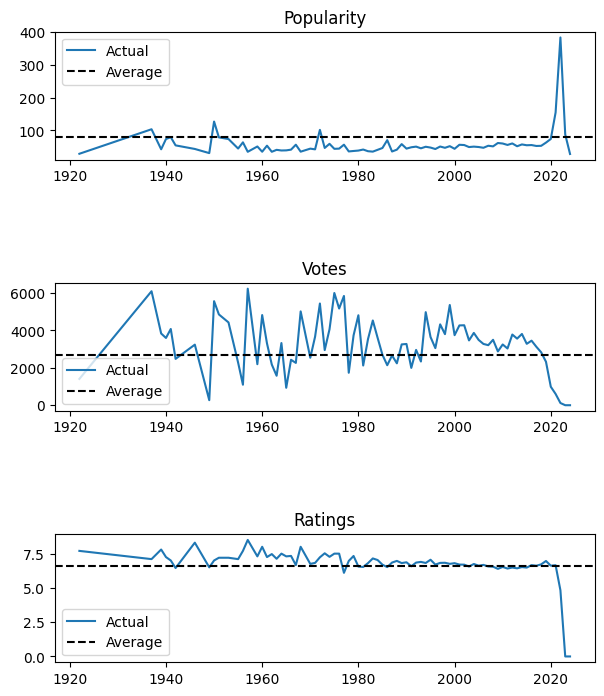

In [8]:
df['Year'] = [int(x[0:4]) for x in df['Release_Date']]
yearwise = df[['Year','Popularity','Vote_Count','Vote_Average']].groupby(['Year']).mean()
average = df[['Year','Popularity','Vote_Count','Vote_Average']].mean()

fig,ax = plt.subplots(3,1)
ax[0].plot(yearwise.index,yearwise['Popularity'],label='Actual')
ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
ax[0].set_title('Popularity')
ax[0].legend(loc='best')

ax[1].plot(yearwise.index,yearwise['Vote_Count'],label='Actual')
ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
ax[1].set_title('Votes')
ax[1].legend(loc='best')

ax[2].plot(yearwise.index,yearwise['Vote_Average'],label='Actual')
ax[2].axhline(y = average[3], linestyle = '--',label='Average',c='black')
ax[2].set_title('Ratings')
ax[2].legend(loc='best')

fig.tight_layout(pad=2.0)
fig.set_figheight(8)
plt.show()
# average

#### Genre-Wise Split

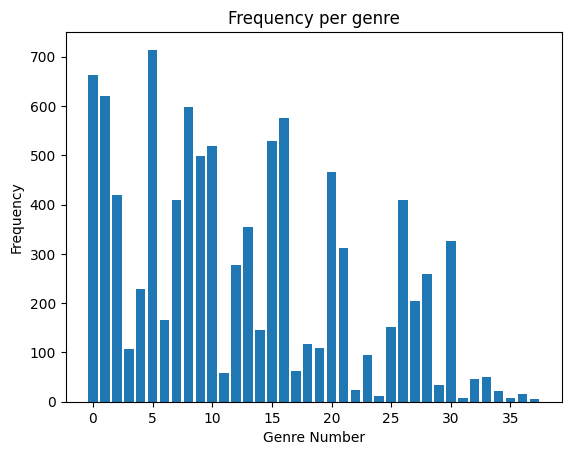

Maximum Genre and Value:  Thriller | 714
Minimum Genre and Value: History | 5


In [9]:
genre_values = {}
value_dict = {}
def genre_fill(row):
    for genre in row.split(','):
        if genre in genre_values.keys():
            genre_values[genre]+=1
        else:
            genre_values[genre]=1

for row in df['Genre']:
    genre_fill(row)
    
plt.bar(np.arange(len(genre_values.keys())),genre_values.values())
plt.title('Frequency per genre')
plt.xlabel('Genre Number')
plt.ylabel('Frequency')
plt.show()

max_key = max(genre_values, key=genre_values.get)
min_key = min(genre_values, key=genre_values.get)
print(f"Maximum Genre and Value: {max_key} | {max(genre_values.values())}")
print(f"Minimum Genre and Value: {min_key} | {min(genre_values.values())}")

#### Heatmap

<Axes: >

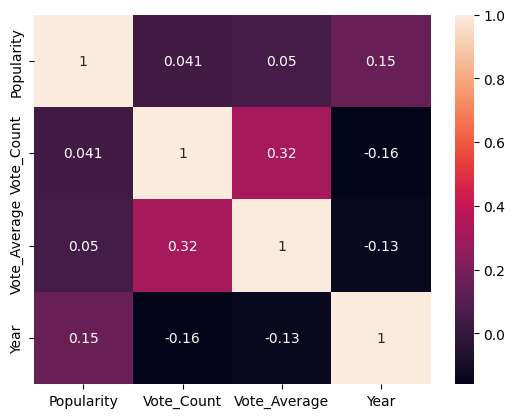

In [10]:
cols = df.describe().columns
sb.heatmap(df[cols].corr(),annot=True)

#### Pairplots

C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When gro

[]

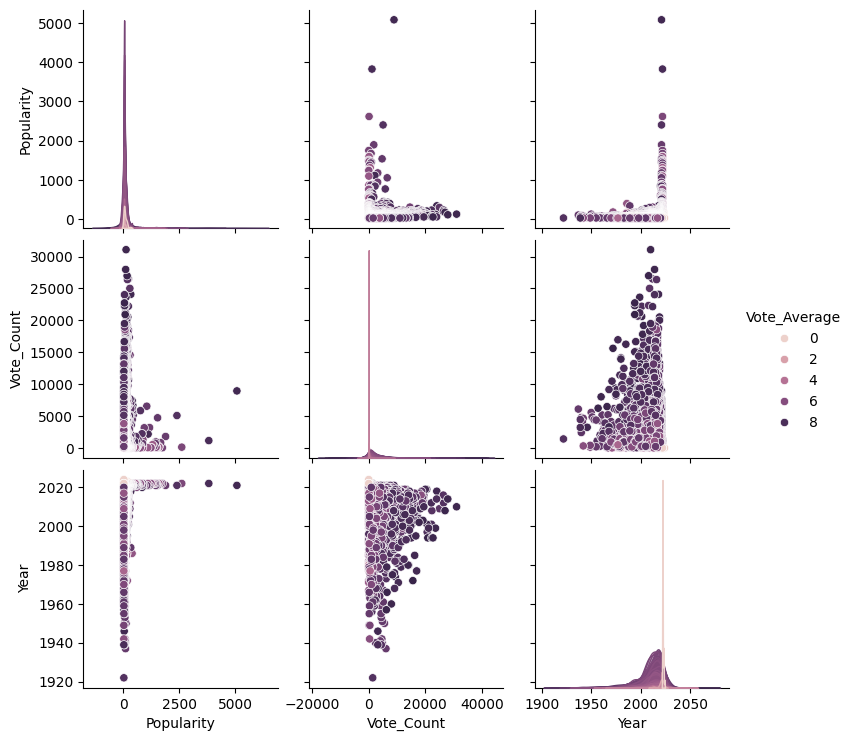

In [11]:
sb.pairplot(df,hue='Vote_Average')
plt.plot()

### Preprocessing

In [12]:
df['Overview_Stemmed'] =  df['Overview'] + " " + df['Genre'] + " " + df['Original_Language'] + df['Title'] 

#### Lowercasing

In [13]:
def lower(text):
    return text.lower()

df['Title_Lower'] = df['Title'].apply(lower)

#### Porter Stemming

In [14]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stem = PorterStemmer()
def stem_sentence(text):
    y = []
    for word in text.split(" "):
        y.append(stem.stem(word))
    return " ".join(val for val in y)   

df['Overview_Stemmed'] = df['Overview_Stemmed'].apply(stem_sentence)

#### Vectorizing

In [15]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'),max_features=10000)
numeric_overview = vectorizer.fit_transform(df['Overview_Stemmed']).toarray()
numeric_overview

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Similarity Matrix


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(numeric_overview)
similarity_matrix[0]

array([1.        , 0.0100956 , 0.01456266, ..., 0.        , 0.0214604 ,
       0.005763  ])

### SpaCy Similarity Mispell Handling

In [17]:
# python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')
def matchTitle(title):
    l = []
    for word in title.split(' '):
        if word not in stopwords.words('english'):
            l.append(word)
    title = " ".join(l).strip()
    doc = nlp(lower(title))
    l = []
    for row in df['Title']:
        l.append(nlp(row).similarity(doc))
    df['Similar'] = l
    return df.sort_values(by='Similar',ascending=False).head(6).sort_values(by='Popularity',ascending=False)
    
print(matchTitle("Star wars: The Return of Jedi"))

C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


     Release_Date                                   Title  \
403    2021-10-27           Bordertown: The Mural Murders   
431    2012-06-20         Abraham Lincoln: Vampire Hunter   
785    2015-12-15            Star Wars: The Force Awakens   
847    2017-12-13                Star Wars: The Last Jedi   
1622   2013-07-30  Justice League: The Flashpoint Paradox   
1678   2011-04-09          Green Lantern: Emerald Knights   

                                               Overview  Popularity  \
403   A mural painted with blood is found on the wal...     122.037   
431   President Lincoln's mother is killed by a supe...     116.620   
785   Thirty years after defeating the Galactic Empi...      77.811   
847   Rey develops her newly discovered abilities wi...      73.522   
1622  The Flash finds himself in a war-torn alternat...      47.571   
1678  As the home planet of the Green Lantern Corps ...      46.286   

      Vote_Count  Vote_Average Original_Language  \
403           44      

### Fuzzy Matching Mispell Handling

In [46]:
from thefuzz import fuzz,process

def match_fuzzy(title):
    return process.extract(title.lower(),df['Title_Lower'],scorer=fuzz.token_sort_ratio)[0][0]

match_fuzzy("Spiderman far from home")

'spider-man: far from home'

### Fetch Function

In [53]:
def fetch(movie):
    try:
        index = df[df['Title_Lower']==movie.lower()].index[0]
    except:
        index = df[df['Title_Lower']==match_fuzzy(movie)].index[0]
    movies = sorted(list(enumerate(similarity_matrix[index])),reverse=True,key=lambda x:x[1])[1:6]
    similar_movies = []
    for movie in movies:
        similar_movies.append(df.iloc[movie[0]])
    return pd.DataFrame(similar_movies).sort_values(by='Popularity',ascending=False).drop(['Title_Lower','Overview_Stemmed'],axis=1)
    
fetch('the ones and onlys')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year,Similar
2707,2016-11-29,La La Land,"Mia, an aspiring actress, serves lattes to mov...",32.683,14081,7.9,en,"Comedy, Drama, Romance, Music",https://image.tmdb.org/t/p/original/uDO8zWDhfW...,2016,0.505019
959,2021-07-29,Resort to Love,Aspiring pop star Erica ends up as the enterta...,67.302,302,7.3,en,"Romance, Comedy",https://image.tmdb.org/t/p/original/6TrkFcgCF8...,2021,0.342110
1888,2014-08-21,If I Stay,"Mia Hall, a talented young cellist, thought th...",42.463,3783,7.4,en,Drama,https://image.tmdb.org/t/p/original/7Twh8h3Wh7...,2014,0.016568
2669,2018-01-26,Forever My Girl,"After being gone for a decade, a country star ...",33.071,949,7.6,en,"Romance, Drama, Music",https://image.tmdb.org/t/p/original/bKqdggnIPe...,2018,0.295330
2774,2014-07-16,Step Up All In,All-stars from the previous Step Up installmen...,32.027,1710,6.8,en,"Romance, Drama, Music",https://image.tmdb.org/t/p/original/bM9U2WDQKe...,2014,0.194111
801,2021-09-01,Millonario sin amor,A successful TV executive changes his identity...,76.637,63,8.0,es,"Romance, Comedy",https://image.tmdb.org/t/p/original/3kmhcUSDIQ...,2021,0.504480


### Pickling

In [20]:
import pickle

f = open('dataframe.pkl','wb')
pickle.dump(df,f)
f.close()

fm = open('matrix.pkl','wb')
pickle.dump(similarity_matrix,fm)
fm.close()